In [212]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import xgboost as xgb
from sklearn.metrics import matthews_corrcoef

In [213]:
import gensim
from gensim.models import Doc2Vec
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from string import punctuation
import timeit
from sklearn.cluster import KMeans
from sklearn import metrics
import pylab as pl
import matplotlib.pyplot as plt

In [214]:
os.chdir('C:\\Users\\royal\\Downloads\\Compressed\\inno')

In [4]:
%%time
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
info_train=pd.read_csv('information_train.csv', sep='\t')
info_test=pd.read_csv('information_test.csv', sep='\t')

Wall time: 929 ms


In [215]:
train.head()

,pmid,ref_list,len_ref,outset,outid,outlabel
0,17074820,"['15153999', '15213210', '7668302']",3,3,6246891,"[('7031658', 0.8728618621826172), ('7052059', ..."
1,15153999,"['12721363', '9096352', '10788337', '9114021',...",5,3,1827140,"[('8350062', 0.8371134996414185), ('3088206', ..."
2,15213210,"['11466240', '12184798']",2,3,7699333,"[('3501371', 0.849490225315094), ('6764536', 0..."
3,7668302,['1539589'],1,3,4299129,"[('4299130', 0.9333001375198364), ('4214106', ..."
4,12721363,"['9465087', '11842208', '11309498', '9465125',...",6,3,4299130,"[('4299129', 0.9333001375198364), ('2139778', ..."


In [229]:
# set(list(train.outid.values))
train.loc[train['outset'] == '2']

,pmid,ref_list,len_ref,outset,outid,outlabel
0,17074820,"['15153999', '15213210', '7668302']",3,2,16927957,"[('568163', 0.9727935791015625), ('8670835', 0..."
1,15153999,"['12721363', '9096352', '10788337', '9114021',...",5,2,16277606,"[('9221759', 0.9628382325172424), ('359747', 0..."
2,15213210,"['11466240', '12184798']",2,2,3488550,"[('2919186', 0.929149329662323), ('2316620', 0..."
3,7668302,['1539589'],1,2,8019746,"[('8564234', 0.9617283940315247), ('7606344', ..."
4,12721363,"['9465087', '11842208', '11309498', '9465125',...",6,2,11532965,"[('9819381', 0.989176869392395), ('9891084', 0..."
5,9096352,"['8454213', '8986803', '8849901', '8524801', '...",8,2,8170966,"[('1565658', 0.9709857702255249), ('1351684', ..."
6,10788337,"['2563633', '2569271', '2569272', '1978553', '...",17,2,10385247,"[('1665729', 0.9590461850166321), ('6249436', ..."
7,9114021,"['7624310', '8940282']",2,2,9484853,"[('3955301', 0.9326112270355225), ('1422590', ..."
8,10330360,['1539589'],1,2,7679023,"[('3259257', 0.8897383213043213), ('8383563', ..."
9,9634526,['7668271'],1,2,6958342,"[('3488550', 0.9125161170959473), ('2316620', ..."


In [6]:
info_train.head(5)

,abstract,article_title,author_str,pmid,pub_date,set,full_Text
0,"Among bioethicists and members of the public, ...",The routinisation of genomics and genetics: im...,"M W Foster, C D M Royal, R R Sharp",17074820,2006-11-01,13,NaN
1,Genomics resources that use samples from ident...,Integrating ethics and science in the Internat...,NaN,15153999,2008-02-25,13,NaN
2,Alleviating health disparities in the United S...,Genetic Research and Health Disparities,"Pamela Sankar, Mildred K. Cho, Celeste M. Cond...",15213210,2008-02-20,13,NaN
3,Protecting the confidentiality of genetic rese...,Certificates of confidentiality: a valuable to...,"C L Earley, L C Strong",7668302,1995-09-01,13,NaN
4,Whereas the human linkage map appears on limit...,Linkage disequilibrium in human populations,"Christine Lonjou, Weihua Zhang, Andrew Collins...",12721363,2003-05-13,13,NaN


In [7]:
info_test.info()
# info_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 7 columns):
abstract         2034 non-null object
article_title    2034 non-null object
author_str       1881 non-null object
pmid             2034 non-null int64
pub_date         2034 non-null object
set              2034 non-null int64
full_Text        26 non-null object
dtypes: int64(2), object(5)
memory usage: 111.3+ KB


In [74]:
info_train["all_cont"] = info_train["article_title"].map(str) +'. '+ info_train["abstract"]

info_test["all_cont"] = info_test["article_title"].map(str) +'. '+ info_test["abstract"]

In [8]:
#info_train full_text = 141 from 3522
#info_test full_text = 26 from 2034 so droping that column
info_test.drop(['full_Text'],axis=1,inplace=True)
info_train.drop(['full_Text'],axis=1,inplace=True)

In [9]:
set(info_train.set.values)

{2, 3, 5, 6, 8, 13, 14, 16, 18}

In [10]:
len(set(info_train.pub_date.values))

1138

In [11]:
info_train.isnull().sum()

abstract           0
article_title      0
author_str       433
pmid               0
pub_date           0
set                0
dtype: int64

In [12]:
info_test.isnull().sum()

abstract           0
article_title      0
author_str       153
pmid               0
pub_date           0
set                0
dtype: int64

In [13]:
# info_train.groupby('set').count()
info_test.groupby('set')['abstract'].count()
# sns.countplot(info_test.groupby('set')['abstract'].count())

set
1     168
4     336
7      63
9     358
10    324
11     71
15    239
17    266
19    209
Name: abstract, dtype: int64

In [12]:
info_train.groupby('pub_date').count()

,abstract,article_title,author_str,pmid,set
pub_date,,,,,
1952-01-01,2,2,2,2,2
1952-09-30,3,3,3,3,3
1953-05-01,1,1,1,1,1
1954-01-31,3,3,3,3,3
1955-07-01,2,2,2,2,2
1959-03-01,1,1,1,1,1
1959-05-01,3,3,3,3,3
1959-07-01,1,1,1,1,1
1959-09-30,2,2,2,2,2


In [14]:
train.head()

,pmid,ref_list
0,17074820,"['15153999', '15213210', '7668302']"
1,15153999,"['12721363', '9096352', '10788337', '9114021',..."
2,15213210,"['11466240', '12184798']"
3,7668302,['1539589']
4,12721363,"['9465087', '11842208', '11309498', '9465125',..."


In [15]:
kk=[]
for i in info_train.author_str.values:
    if i!=np.nan:
        kk.extend(str(i).split(','))

In [16]:
kk1=[]
for i in kk:
    if i.strip()!='nan':
        kk1.append(i.strip())

In [17]:
len(set(kk1))

10914

In [18]:
#total number of authors 10914
#'E Wimmer' are cited 28 times.
max(set(kk1), key=kk1.count)

'E Wimmer'

In [ ]:
dt = pd.DatetimeIndex ( info_train.pub_date ).astype ( np.int64 )/100000000000

In [ ]:
dt

In [19]:
info_train['pmid'].loc[info_train['set'] == 13]

0      17074820
1      15153999
2      15213210
3       7668302
4      12721363
5       9096352
6      10788337
7       9114021
8      10330360
9       9634526
10     11466240
11     12184798
12     14561327
13     12900503
14      1539589
15      9465087
16     11842208
17     11309498
18      9465125
19      9990074
20     12486239
21      8454213
22      8986803
23      8849901
24      8524801
25      8651264
26      7668280
27      7847383
28      8159720
29      2563633
         ...   
188     9611208
189     9611209
190    10022981
191     8533777
192     7498756
193     8659526
194     8755923
195     8755932
196     9399816
197     8644711
198     8304347
199     8799174
200     8651312
201     8622960
202     9585595
203     9770501
204    10924481
205    10978293
206    10447507
207     1496985
208     1465380
209     9345087
210     8356042
211     7485171
212     9311756
213     8533774
214     1975791
215     3453117
216     3496523
217     3615198
Name: pmid, Length: 218,

In [19]:
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument

In [20]:
train.head()

,pmid,ref_list
0,17074820,"['15153999', '15213210', '7668302']"
1,15153999,"['12721363', '9096352', '10788337', '9114021',..."
2,15213210,"['11466240', '12184798']"
3,7668302,['1539589']
4,12721363,"['9465087', '11842208', '11309498', '9465125',..."


In [21]:
info_train['ref_list']=train['ref_list']

In [22]:
all_content = []
for i,j in zip(info_train.abstract,info_train.ref_list):
    all_content.append(LabeledSentence1(i,j))

In [24]:
all_content[66]

TaggedDocument(words='Using assembled expressed sequence tags (ESTs) from 50 different cDNA libraries, we have identified contigs that represent the complete coding sequences of 850 known human genes, and have scanned these for high quality sequence substitutions. We report the identification and characteristics of 201 candidate single nucleotide polymorphisms found in the coding sequences (cSNPs) of 165 of these genes. Using a conservative calculation, coding region nucleotide diversity (the average number of differences between any pair of chromosomes) was found to be 3 per 10,000 bp based on this data. This analysis reveals that assembled ESTs from multiple libraries may provide a rich source of comparative sequences to search for cSNPs in the human genome.', tags="['9106523', '10022981']")

In [29]:
d2v_model = Doc2Vec(all_content, size = 2000, window = 10, min_count = 500, workers=7, dm = 1, 
                alpha=0.025, min_alpha=0.001)

In [31]:
d2v_model.save('model.bin')

In [33]:
d2v_model.train(all_content, total_examples=d2v_model.corpus_count, epochs=3, start_alpha=0.002, end_alpha=-0.016)

3377813

In [42]:
d2v_model.similar_by_vector()

C:\Users\royal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.


TypeError: 'int' object is not iterable

In [43]:
print (d2v_model.docvecs.most_similar(66))

KeyError: "doc '66' not in trained set"

In [83]:
info_train['all_cont'].loc[info_train['set'] == 13]

0      The routinisation of genomics and genetics: im...
1      Integrating ethics and science in the Internat...
2      Genetic Research and Health Disparities. Allev...
3      Certificates of confidentiality: a valuable to...
4      Linkage disequilibrium in human populations. W...
5      Microsatellite diversity and the demographic h...
6      Haplotypes and linkage disequilibrium at the p...
7      An apportionment of human DNA diversity. It is...
8      The role of community review in evaluating the...
9      Inflation of sibling recurrence-risk ratio, du...
10     Blindness in Africa: present situation and fut...
11     Categorization of humans in biomedical researc...
12     Genetic epidemiology, genetic maps and positio...
13     Minimal haplotype tagging. The high frequency ...
14     Discrimination as a consequence of genetic tes...
15     Mapping a disease locus by allelic association...
16     The first linkage disequilibrium (LD) maps: De...
17     The optimal measure of a

In [155]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# data = info_train.all_cont
# label= info_train.pmid
data = info_train['all_cont'].loc[info_train['set'] == 13]
label= info_train['pmid'].loc[info_train['set'] == 13]

tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in zip(label,data)]

#tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

model = Doc2Vec(size=3000,
                alpha=0.025, 
                min_alpha=0.025,
                min_count=1,
                dm =1)

model.build_vocab(tagged_data)

for epoch in range(10):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v13.model")
print("Model Saved")

from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v13.model")
#to find the vector of a document which is not in training data
# test_data = word_tokenize("I love chatbots".lower())
# v1 = model.infer_vector(test_data)
# print("V1_infer", v1)

# to find most similar doc using tags
# similar_doc = model.docvecs.most_similar('2')
# print(similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
# print(model.docvecs['1'])

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


In [224]:
set(info_test['set'])

{1, 4, 7, 9, 10, 11, 15, 17, 19}

In [160]:
ll=[2,3,5,6,8,13,14,16,18]
ll

[2, 3, 5, 6, 8, 13, 14, 16, 18]

In [225]:
#for train
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# ll=[2,3,5,6,8,13,14,16,18]
ll=[2,3]
ii=0
for ijk in ll:
    
    data = info_train['all_cont'].loc[info_train['set'] == ijk]
    label= info_train['pmid'].loc[info_train['set'] == ijk]

    tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in zip(label,data)]

    model = Doc2Vec(size=8000,alpha=0.025, min_alpha=0.025,min_count=1,dm =1)

    model.build_vocab(tagged_data)

    for epoch in range(4):
        print('iteration {0}'.format(epoch))
        model.train(tagged_data,total_examples=model.corpus_count,epochs=model.iter)
        model.alpha -= 0.0002
        model.min_alpha = model.alpha
    
    model_name = 'models\\'+'d2v'+str(ijk)+'.model'
    model.save(model_name)
    print("Model Saved")

    model= Doc2Vec.load(model_name)
    print('start to get model similarity')
    
    for j in label:
        train.ix[ii,'outset']=str(ijk)
        train.ix[ii,'outid']=str(j)
        train.ix[ii,'outlabel']=str(model.docvecs.most_similar(str(j)))
        ii=ii+1

iteration 0
iteration 1
iteration 2
iteration 3
Model Saved
start to get model similarity
iteration 0
iteration 1
iteration 2
iteration 3
Model Saved
start to get model similarity


In [231]:
%time
##for test
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# ll=[2,3,5,6,8,13,14,16,18]
ll =[1,4,7,9,10,11,15,17,19]
# ll=[1,4]
ii=0
for ijk in ll:
    
    data = info_test['all_cont'].loc[info_test['set'] == ijk]
    label= info_test['pmid'].loc[info_test['set'] == ijk]

    tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in zip(label,data)]

    model = Doc2Vec(size=6000,alpha=0.025, min_alpha=0.025,min_count=1,dm =1)

    model.build_vocab(tagged_data)

    for epoch in range(10):
        print('iteration {0}'.format(epoch))
        model.train(tagged_data,total_examples=model.corpus_count,epochs=model.iter)
        model.alpha -= 0.0002
        model.min_alpha = model.alpha
    
    model_name = 'models\\'+'d2vtest'+str(ijk)+'.model'
    model.save(model_name)
    print("Model Saved")

    model= Doc2Vec.load(model_name)
    print('start to get model similarity')
    
    for j in label:
        test.ix[ii,'outset']=str(ijk)
        test.ix[ii,'outid']=str(j)
        test.ix[ii,'outlabel']=str(model.docvecs.most_similar(str(j)))
        ii=ii+1

Wall time: 0 ns
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved
start to get model similarity


C:\Users\royal\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved
start to get model similarity
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved
start to get model similarity
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved
start to get model similarity
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved
start to get model similarity
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved
start to get model similarity
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved
start to get model similarity
iteration 0
iteration 1
iter

In [230]:
%time
ijk

Wall time: 0 ns


3

In [195]:
label[:5]

2352    16927957
2353    16277606
2354     3488550
2355     8019746
2356    11532965
Name: pmid, dtype: int64

In [206]:
for i,j in enumerate(label):
    train.ix[i,'outset']=str(ijk)
    train.ix[i,'outid']=str(j)
    train.ix[i,'outlabel']=str(model.docvecs.most_similar(str(j)))

In [162]:
label[:5]

0    17074820
1    15153999
2    15213210
3     7668302
4    12721363
Name: pmid, dtype: int64

In [194]:
similar_doc = model.docvecs.most_similar('16927957')
print(similar_doc)

[('568163', 0.9462569952011108), ('14392241', 0.9418874979019165), ('8670835', 0.9415265321731567), ('8707852', 0.940422773361206), ('16277606', 0.9394595623016357), ('9891084', 0.9285329580307007), ('9700169', 0.9284000992774963), ('9480987', 0.9267293810844421), ('9819381', 0.9264720678329468), ('8622664', 0.9253888130187988)]


In [164]:
similar_doc[0][0]

'7668302'

In [ ]:
[('7236566', 0.738998293876648), ('2036343', 0.7030819058418274), ('7703204', 0.6836878061294556),
 ('15213210', 0.6530904769897461), ('7236567', 0.6519558429718018), ('1539589', 0.6392549276351929),
 ('17074820', 0.6008319854736328), ('2611189', 0.5934818983078003), ('9569667', 0.5745325684547424),
 ('7668302', 0.5534095764160156)]

In [ ]:
[('12184798', 0.6367453336715698), ('17074820', 0.6224201917648315), ('10102003', 0.6086893677711487), 
 ('15153999', 0.6059714555740356), ('1539589', 0.5906877517700195), ('22263709', 0.5883538126945496), 
 ('19008068', 0.5868812799453735), ('15213210', 0.5669870972633362), ('21126830', 0.5633509159088135),
 ('17514069', 0.5558061003684998)]

In [193]:
info_train.loc[info_train['pmid'] == 16927957]

,abstract,article_title,author_str,pmid,pub_date,set,ref_list,all_cont
2352,The neuropeptide calcitonin gene-related pepti...,Calcitonin Gene-Related Peptide (CGRP) and Mig...,Paul L. Durham,16927957,2011-07-06,2,"['16277606', '3488550']",Calcitonin Gene-Related Peptide (CGRP) and Mig...


In [ ]:
17074820	['15153999', '15213210', '7668302']

In [130]:
print(model.docvecs.similarity('8533774','8178829'))

0.555637516907


In [47]:
data = info_train.abstract
label= info_train.pmid

tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in zip(label,data)]

In [48]:
tagged_data[0]

TaggedDocument(words=['among', 'bioethicists', 'and', 'members', 'of', 'the', 'public', ',', 'genetics', 'is', 'often', 'regarded', 'as', 'unique', 'in', 'its', 'ethical', 'challenges', '.', 'as', 'medical', 'researchers', 'and', 'clinicians', 'increasingly', 'combine', 'genetic', 'information', 'with', 'a', 'range', 'of', 'non‐genetic', 'information', 'in', 'the', 'study', 'and', 'clinical', 'management', 'of', 'patients', 'with', 'common', 'diseases', ',', 'the', 'unique', 'ethical', 'challenges', 'attributed', 'to', 'genetics', 'must', 'be', 're‐examined', '.', 'a', 'process', 'of', 'genetic', 'routinisation', 'that', 'will', 'have', 'implications', 'for', 'research', 'and', 'clinical', 'ethics', ',', 'as', 'well', 'as', 'for', 'public', 'conceptions', 'of', 'genetic', 'information', ',', 'is', 'constituted', 'by', 'the', 'emergence', 'of', 'new', 'forms', 'of', 'genetic', 'medicine', ',', 'in', 'which', 'genetic', 'information', 'is', 'interpreted', 'in', 'a', 'multifactorial', 'fr

In [207]:
train.head(7)

,pmid,ref_list,len_ref,outid,outlabel,outset
0,17074820,"['15153999', '15213210', '7668302']",3,16927957,"[('568163', 0.9462569952011108), ('14392241', ...",2
1,15153999,"['12721363', '9096352', '10788337', '9114021',...",5,16277606,"[('568163', 0.9612374901771545), ('359747', 0....",2
2,15213210,"['11466240', '12184798']",2,3488550,"[('2316620', 0.9268930554389954), ('2919186', ...",2
3,7668302,['1539589'],1,8019746,"[('8564234', 0.9531375765800476), ('1327382', ...",2
4,12721363,"['9465087', '11842208', '11309498', '9465125',...",6,11532965,"[('1537333', 0.986920177936554), ('7813420', 0...",2
5,9096352,"['8454213', '8986803', '8849901', '8524801', '...",8,8170966,"[('1351684', 0.969649076461792), ('1565658', 0...",2
6,10788337,"['2563633', '2569271', '2569272', '1978553', '...",17,10385247,"[('6249436', 0.968595564365387), ('13651579', ...",2


In [145]:
train['len_ref'] = train["ref_list"].map(len)//11

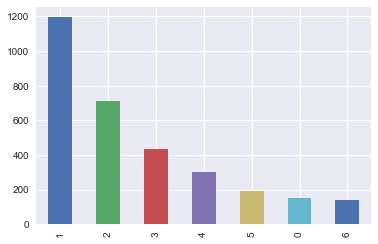

In [312]:
## [1,2,3,4,5] = 2820 , total = 3522
train['len_ref'].value_counts().head(7).plot.bar()

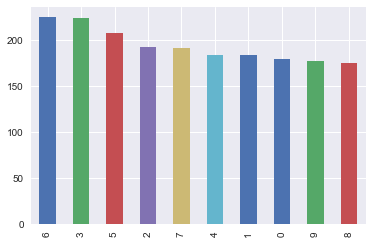

In [314]:
tes['len_dat'].value_counts().head(10).plot.bar()

In [147]:
set(train['len_ref'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 47,
 54}

In [165]:
train.shape
st.ix[i, 'a'] = a

(3522, 3)

In [186]:
for i,j in enumerate(range(100,200,1)):
#     train['temp'].loc(i)
    train.ix[i,'temp']=j

In [209]:
train.drop(['outid','outlabel','outset'],axis=1,inplace=True)

In [210]:
train.head()

,pmid,ref_list,len_ref
0,17074820,"['15153999', '15213210', '7668302']",3
1,15153999,"['12721363', '9096352', '10788337', '9114021',...",5
2,15213210,"['11466240', '12184798']",2
3,7668302,['1539589'],1
4,12721363,"['9465087', '11842208', '11309498', '9465125',...",6


In [188]:
train[100:105]

,pmid,ref_list,len_ref,temp
100,6750607,"['4854919', '496890']",1,NaN
101,4854919,['4854920'],1,NaN
102,3475690,['6750607'],1,NaN
103,1981599,"['2904221', '2565077', '1967207', '9556654']",4,NaN
104,1609797,"['2564729', '2574002', '2904221', '1971147']",4,NaN


In [232]:
tes=pd.read_csv('testfile10.csv')

In [303]:
tes['len_dat'] = tes["datlist"].map(len)//11

In [310]:
tes.head(5)

,Unnamed: 0,pmid,outset,outid,outlabel,outlist,datlist,len_dat
0,0,14058267,1,19871314,"[('13641562', 0.996971845626831), ('19869169',...","['13641562', '19869169', '19870090', '13710682...","['19869169', '19870090', '19870326', '19869648']",7
1,1,4550818,1,13641562,"[('19870326', 0.9987107515335083), ('19869220'...","['19870326', '19869220', '19869169', '19871314...","['19870326', '19869220', '19869169', '19871314']",10
2,2,14222809,1,14067904,"[('19871355', 0.9978694915771484), ('19869424'...","['19871355', '19869424', '14946331', '14042930...","['19871355', '19869424', '14946331', '14042930']",10
3,3,4164675,1,5837777,"[('13999018', 0.9973123073577881), ('14033865'...","['13999018', '14033865', '14340043', '14907964...","['13999018', '14033865', '14340043', '14907964']",9
4,4,6211173,1,19869404,"[('19870707', 0.9966895580291748), ('13475611'...","['19870707', '13475611', '13785271', '19870978...",[],0


In [239]:
info_test.head()

,abstract,article_title,author_str,pmid,pub_date,set,all_cont
0,Cell lines selected in multiple steps for incr...,"The gene for a novel protein, a member of the ...","M M Chaudhuri, P N Tonin, W H Lewis, P R Srini...",1311171,1992-02-01,17,"The gene for a novel protein, a member of the ..."
1,Prolyl 4-hydroxylase (EC 1.14.11.2) is an esse...,Inhibition of prolyl 4-hydroxylase by hydroxya...,"C J Cunliffe, T J Franklin",3028370,1986-10-15,17,Inhibition of prolyl 4-hydroxylase by hydroxya...
2,From the structure-activity relationships of k...,Time-dependent inactivation of chick-embryo pr...,"V Gunzler, H M Hanauske-Abel, R Myllyla, J Moh...",3036081,1987-02-15,17,Time-dependent inactivation of chick-embryo pr...
3,The anthracyclines doxorubicin and daunorubici...,Syncatalytic inactivation of prolyl 4-hydroxyl...,"V Gunzler, H M Hanauske-Abel, R Myllyla, D D K...",2840891,1988-04-15,17,Syncatalytic inactivation of prolyl 4-hydroxyl...
4,The levels of lysine hydroxylase protein and t...,Minoxidil specifically decreases the expressio...,"T Hautala, J Heikkinen, K I Kivirikko, R Myllyla",1314568,1992-04-01,17,Minoxidil specifically decreases the expressio...


In [262]:
from ast import literal_eval
k=tes.outlist[0]


In [296]:
tes.outid[0]

19871314

In [295]:
tes.shape[0]

2034

In [263]:
k

"['13641562', '19869169', '19870090', '13710682', '19870326', '19869648', '19870148', '19869449', '19869556', '13539305']"

In [307]:
len(lss)

4

In [ ]:
from ast import literal_eval
tes=pd.read_csv('testfile10.csv')

In [308]:
ii=0
for i in range(tes.shape[0]):
    mid = tes.outid[i]
    mlis = literal_eval(tes.outlist[i])
    mdat = info_test['pub_date'].loc[info_test['pmid'].map(str) == str(mid)]
    mdat1 = pd.DatetimeIndex ( mdat ).astype ( np.int32 )[0]
    lss = []
    for j in mlis:
        lisdat = info_test['pub_date'].loc[info_test['pmid'].map(str) == j]
        lisdat1 = pd.DatetimeIndex ( lisdat ).astype ( np.int32 )[0]
        if mdat1 > lisdat1:
            lss.append(j)
    tt=4
    if len(lss)>tt:
        tes.ix[ii,'datlist']=str(lss[:tt])
    else:
        tes.ix[ii,'datlist']=str(lss)
    ii=ii+1

In [248]:
for i in literal_eval(k):
    print(info_test.loc[info_test['pmid'].map(str) == i])

                                               abstract  \
1356  A bacterial substance has been described which...   

                                          article_title      author_str  \
1356  THE OCCURRENCE OF POLYGLYCEROPHOSPHATE AS AN A...  Maclyn McCarty   

          pmid    pub_date  set  \
1356  13641562  1959-03-31    1   

                                               all_cont  
1356  THE OCCURRENCE OF POLYGLYCEROPHOSPHATE AS AN A...  
                                               abstract  \
1507  A biological classification has been made of t...   

                                          article_title           author_str  \
1507  A BIOLOGICAL CLASSIFICATION OF ENCAPSULATUS PN...  Louis A. Julianelle   

          pmid    pub_date  set  \
1507  19869169  1926-06-30    1   

                                               all_cont  
1507  A BIOLOGICAL CLASSIFICATION OF ENCAPSULATUS PN...  
                                               abstract  \
1426  To determin

In [246]:
literal_eval(k)

['13641562',
 '19869169',
 '19870090',
 '13710682',
 '19870326',
 '19869648',
 '19870148',
 '19869449',
 '19869556',
 '13539305']

In [250]:
info_test['pub_date'].loc[info_test['pmid'].map(str) == '13641562']

1356    1959-03-31
Name: pub_date, dtype: object

In [258]:
##outid
tes['outid'].loc[tes['pmid'].map(str) == '19871314']
# tes.loc[tes['pmid'] == '16927957']

1994    13631208
Name: outid, dtype: int64

In [264]:
info_test['pub_date'].loc[info_test['pmid'].map(str) == '19871314']
info_test['pub_date'].loc[info_test['pmid'].map(str) == '13641562']

1356    1959-03-31
Name: pub_date, dtype: object

In [275]:
info_test['pub_date'].loc[info_test['pmid'].map(str) == '19871314'] info_test['pub_date'].loc[info_test['pmid'].map(str) == '13641562']

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [286]:
dt = pd.DatetimeIndex ( info_test['pub_date'].loc[info_test['pmid'].map(str) == '19871314'] ).astype ( np.int32 )
# info_test['pub_date'].loc[info_test['pmid'].map(str) == '19871314']
dt1 = pd.DatetimeIndex ( info_test['pub_date'].loc[info_test['pmid'].map(str) == '13641562'] ).astype ( np.int32 )


In [293]:
dt1[0] > dt[0]

True

In [289]:
print(dt)
print(dt1)

Int64Index([-833760000000000000], dtype='int64', name='pub_date')
Int64Index([-339465600000000000], dtype='int64', name='pub_date')
